# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [2]:
# ===========================================================
#  RANDOM FOREST MODEL FOR LEFT vs RIGHT HAND IMAGERY (BCI)
#  Using PhysioNet EEG Motor Movement/Imagery Dataset (EEGMMIDB)
#  Fully Working Jupyter Notebook
# ===========================================================

!pip install mne wfdb scikit-learn numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [5]:
import os
import numpy as np
import mne
import wfdb
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [6]:
# Download dataset (only done first time)
wfdb.dl_database("eegmmidb", dl_dir="physio_eeg")


Generating record list for: S001/S001R01.edf
Generating record list for: S001/S001R02.edf
Generating record list for: S001/S001R03.edf
Generating record list for: S001/S001R04.edf
Generating record list for: S001/S001R05.edf
Generating record list for: S001/S001R06.edf
Generating record list for: S001/S001R07.edf
Generating record list for: S001/S001R08.edf
Generating record list for: S001/S001R09.edf
Generating record list for: S001/S001R10.edf
Generating record list for: S001/S001R11.edf
Generating record list for: S001/S001R12.edf
Generating record list for: S001/S001R13.edf
Generating record list for: S001/S001R14.edf
Generating record list for: S002/S002R01.edf
Generating record list for: S002/S002R02.edf
Generating record list for: S002/S002R03.edf
Generating record list for: S002/S002R04.edf
Generating record list for: S002/S002R05.edf
Generating record list for: S002/S002R06.edf
Generating record list for: S002/S002R07.edf
Generating record list for: S002/S002R08.edf
Generating

NetFileNotFoundError: 404 Error: Not Found for url: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf.hea

In [7]:
!wget -O eegmmidb.zip https://physionet.org/static/published-projects/eegmmidb/eeg-motor-movementimagery-dataset-1.0.0.zip
!unzip eegmmidb.zip -d physio_eeg


--2025-12-07 12:21:13--  https://physionet.org/static/published-projects/eegmmidb/eeg-motor-movementimagery-dataset-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://physionet.org/content/eegmmidb/get-zip/1.0.0/ [following]
--2025-12-07 12:21:13--  https://physionet.org/content/eegmmidb/get-zip/1.0.0/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1997435063 (1.9G) [application/zip]
Saving to: ‘eegmmidb.zip’

eegmmidb.zip        100%[===================>]   1.86G   386KB/s    in 83m 33s 

2025-12-07 13:44:46 (389 KB/s) - ‘eegmmidb.zip’ saved [1997435063/1997435063]

Archive:  eegmmidb.zip
   creating: physio_eeg/files/
   creating: physio_eeg/files/S001/
   creating: physio_eeg/files/S002/
   creating: physio_eeg/files/S003/
   creating: physio_eeg/files/S004/
 

In [8]:
import glob

edf_files = sorted(glob.glob("/content/physio_eeg/**/*.edf", recursive=True))
print("Number of EDF files found:", len(edf_files))
edf_files[:5]


Number of EDF files found: 1526


['/content/physio_eeg/files/S001/S001R01.edf',
 '/content/physio_eeg/files/S001/S001R02.edf',
 '/content/physio_eeg/files/S001/S001R03.edf',
 '/content/physio_eeg/files/S001/S001R04.edf',
 '/content/physio_eeg/files/S001/S001R05.edf']

In [9]:
edf_files = []
for root, dirs, files in os.walk("physio_eeg"):
    for f in files:
        if f.endswith(".edf"):
            edf_files.append(os.path.join(root, f))

print("Total EDF files found:", len(edf_files))


Total EDF files found: 1526


In [10]:
def extract_features(trial, sf=160):
    features = []
    for channel in trial:
        features.append(np.mean(channel))
        features.append(np.std(channel))

        freqs, psd = welch(channel, sf)

        alpha = np.trapz(psd[(freqs >= 8) & (freqs <= 12)])
        beta  = np.trapz(psd[(freqs >= 12) & (freqs <= 30)])
        gamma = np.trapz(psd[(freqs >= 30) & (freqs <= 40)])

        features.extend([alpha, beta, gamma])
    return features


In [11]:
X_all = []
y_all = []

for edf_path in edf_files[:20]:   # using first 20 subjects to keep it fast
    try:
        print("Processing:", edf_path)

        # Load EEG
        raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)
        raw.filter(1., 40., verbose=False)     # Band-pass filter

        # Extract event markers
        events, event_ids = mne.events_from_annotations(raw, verbose=False)

        # Extract left & right epochs
        if '2' in event_ids.values() or '3' in event_ids.values():
            epochs = mne.Epochs(
                raw,
                events,
                event_id={'left': 2, 'right': 3},
                tmin=0,
                tmax=4,
                baseline=None,
                preload=True,
                verbose=False
            )

            X = epochs.get_data()        # (trials, channels, time)
            y = epochs.events[:, -1]     # 2 or 3 labels

            y = np.array([0 if label == 2 else 1 for label in y])

            # Extract features for each trial
            for trial in X:
                feats = extract_features(trial)
                X_all.append(feats)
            y_all.extend(y)

    except Exception as e:
        print("Error:", e)


Processing: physio_eeg/files/S064/S064R01.edf
Processing: physio_eeg/files/S064/S064R14.edf
Processing: physio_eeg/files/S064/S064R07.edf
Processing: physio_eeg/files/S064/S064R08.edf
Processing: physio_eeg/files/S064/S064R04.edf
Processing: physio_eeg/files/S064/S064R11.edf
Processing: physio_eeg/files/S064/S064R03.edf
Processing: physio_eeg/files/S064/S064R10.edf
Processing: physio_eeg/files/S064/S064R09.edf
Processing: physio_eeg/files/S064/S064R13.edf
Processing: physio_eeg/files/S064/S064R02.edf
Processing: physio_eeg/files/S064/S064R06.edf
Processing: physio_eeg/files/S064/S064R05.edf
Processing: physio_eeg/files/S064/S064R12.edf
Processing: physio_eeg/files/S026/S026R03.edf
Processing: physio_eeg/files/S026/S026R09.edf
Processing: physio_eeg/files/S026/S026R07.edf
Processing: physio_eeg/files/S026/S026R10.edf
Processing: physio_eeg/files/S026/S026R05.edf
Processing: physio_eeg/files/S026/S026R12.edf


In [12]:
X_all = np.array(X_all)
y_all = np.array(y_all)

print("Total Samples:", X_all.shape)
print("Total Labels:", y_all.shape)


Total Samples: (0,)
Total Labels: (0,)


In [13]:
import glob
edf_files = glob.glob("/content/physio_eeg/**/*.edf", recursive=True)
print("EDF files found:", len(edf_files))
edf_files[:10]


EDF files found: 1526


['/content/physio_eeg/files/S064/S064R01.edf',
 '/content/physio_eeg/files/S064/S064R14.edf',
 '/content/physio_eeg/files/S064/S064R07.edf',
 '/content/physio_eeg/files/S064/S064R08.edf',
 '/content/physio_eeg/files/S064/S064R04.edf',
 '/content/physio_eeg/files/S064/S064R11.edf',
 '/content/physio_eeg/files/S064/S064R03.edf',
 '/content/physio_eeg/files/S064/S064R10.edf',
 '/content/physio_eeg/files/S064/S064R09.edf',
 '/content/physio_eeg/files/S064/S064R13.edf']

In [14]:
for f in edf_files[:20]:
    print(f, "->", get_label(f))


NameError: name 'get_label' is not defined

In [15]:
def get_label(filename):
    f = filename.upper()

    # Left-hand motor imagery tasks
    if any(x in f for x in ["R03", "R07", "R11"]):
        return 0

    # Right-hand motor imagery tasks
    if any(x in f for x in ["R04", "R08", "R12"]):
        return 1

    return None   # ignore other runs


In [16]:
for f in edf_files[:20]:
    print(f, "->", get_label(f))


/content/physio_eeg/files/S064/S064R01.edf -> None
/content/physio_eeg/files/S064/S064R14.edf -> None
/content/physio_eeg/files/S064/S064R07.edf -> 0
/content/physio_eeg/files/S064/S064R08.edf -> 1
/content/physio_eeg/files/S064/S064R04.edf -> 1
/content/physio_eeg/files/S064/S064R11.edf -> 0
/content/physio_eeg/files/S064/S064R03.edf -> 0
/content/physio_eeg/files/S064/S064R10.edf -> None
/content/physio_eeg/files/S064/S064R09.edf -> None
/content/physio_eeg/files/S064/S064R13.edf -> None
/content/physio_eeg/files/S064/S064R02.edf -> None
/content/physio_eeg/files/S064/S064R06.edf -> None
/content/physio_eeg/files/S064/S064R05.edf -> None
/content/physio_eeg/files/S064/S064R12.edf -> 1
/content/physio_eeg/files/S026/S026R03.edf -> 0
/content/physio_eeg/files/S026/S026R09.edf -> None
/content/physio_eeg/files/S026/S026R07.edf -> 0
/content/physio_eeg/files/S026/S026R10.edf -> None
/content/physio_eeg/files/S026/S026R05.edf -> None
/content/physio_eeg/files/S026/S026R12.edf -> 1


In [18]:
def get_label(file_path):
    fname = file_path.split("/")[-1]

    # Label mapping
    label_map = {
        "R03": 0, "R07": 0, "R11": 0,   # Rest
        "R04": 1, "R08": 1, "R12": 1,   # Workload
    }

    # Extract Rxx
    for key in label_map.keys():
        if key in fname:
            return label_map[key]

    return None  # Not a workload/rest task file


In [19]:
usable_files = [(f, get_label(f)) for f in edf_files if get_label(f) is not None]
print(len(usable_files), "usable files found")
usable_files[:10]


654 usable files found


[('/content/physio_eeg/files/S064/S064R07.edf', 0),
 ('/content/physio_eeg/files/S064/S064R08.edf', 1),
 ('/content/physio_eeg/files/S064/S064R04.edf', 1),
 ('/content/physio_eeg/files/S064/S064R11.edf', 0),
 ('/content/physio_eeg/files/S064/S064R03.edf', 0),
 ('/content/physio_eeg/files/S064/S064R12.edf', 1),
 ('/content/physio_eeg/files/S026/S026R03.edf', 0),
 ('/content/physio_eeg/files/S026/S026R07.edf', 0),
 ('/content/physio_eeg/files/S026/S026R12.edf', 1),
 ('/content/physio_eeg/files/S026/S026R08.edf', 1)]

In [21]:
print("X shape:", X_all.shape)
print("y shape:", y_all.shape)

print("Unique labels:", np.unique(y_all))


X shape: (0,)
y shape: (0,)
Unique labels: []


In [22]:
import mne

test_file = edf_files[0]
raw = mne.io.read_raw_edf(test_file, preload=True)
print("Channels:", len(raw.ch_names))
print("Duration (sec):", raw.n_times / raw.info['sfreq'])


Extracting EDF parameters from /content/physio_eeg/files/S064/S064R01.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Channels: 64
Duration (sec): 61.0


In [23]:
data = raw.get_data()
print("Shape of EEG:", data.shape)


Shape of EEG: (64, 9760)


In [24]:
def get_label(fname):
    run = int(fname[-6:-4])  # Extract last 2 digits before .edf
    if run in [7, 11]:
        return 0   # Left
    elif run in [8, 12]:
        return 1   # Right
    else:
        return None


In [25]:
valid = sum(get_label(f) is not None for f in edf_files)
print("Valid labeled EDF files:", valid)


Valid labeled EDF files: 436


In [26]:
import mne
import numpy as np

X_all = []
y_all = []

for f in edf_files:
    label = get_label(f)
    if label is None:
        continue  # skip other runs

    # Load EEG
    raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
    data = raw.get_data()                 # shape: (channels, samples)

    # Keep first 64 channels
    data = data[:64, :]

    # Fixed window length = 3 seconds
    sfreq = int(raw.info['sfreq'])
    fixed_len = 3 * sfreq   # usually 3 * 160 = 480 samples

    if data.shape[1] >= fixed_len:
        data = data[:, :fixed_len]  # crop long recordings
    else:
        continue  # skip if too short

    X_all.append(data)
    y_all.append(label)

X_all = np.array(X_all)
y_all = np.array(y_all)

print("X shape:", X_all.shape)
print("y shape:", y_all.shape)
print("Unique labels:", np.unique(y_all))


/tmp/ipython-input-3389876782.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-3389876782.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-3389876782.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-3389876782.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (436, 64) + inhomogeneous part.

In [27]:
fixed_len = 480  # works for 160Hz × 3s


In [28]:
import mne
import numpy as np

fixed_len = 480   # 3 seconds at 160 Hz
X_all = []
y_all = []

for f in edf_files:
    label = get_label(f)
    if label is None:
        continue

    raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
    data = raw.get_data()[:64, :]   # first 64 channels

    # If too long → crop
    if data.shape[1] > fixed_len:
        data = data[:, :fixed_len]

    # If too short → pad
    elif data.shape[1] < fixed_len:
        pad_width = fixed_len - data.shape[1]
        data = np.pad(data, ((0,0), (0, pad_width)), mode='constant')

    # Now shape is exactly (64, fixed_len)
    X_all.append(data)
    y_all.append(label)

X_all = np.array(X_all)
y_all = np.array(y_all)

print("Final X shape:", X_all.shape)
print("Final y shape:", y_all.shape)
print("Unique labels:", np.unique(y_all))


/tmp/ipython-input-1993533299.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-1993533299.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-1993533299.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)
/tmp/ipython-input-1993533299.py:13: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f, preload=True, verbose=False)


Final X shape: (436, 64, 480)
Final y shape: (436,)
Unique labels: [0 1]


In [29]:
# ===============================================
# 🧠 RANDOM FOREST MODEL FOR EEG LEFT/RIGHT BCI
# ===============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [30]:
# Frequency bands (Hz)
bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
    "gamma": (30, 45)
}

sfreq = 160   # EEG sampling frequency (eegmmidb)

def extract_bandpower_features(eeg_sample):
    """
    eeg_sample shape → (64, 480)
    Converts EEG → feature vector of size 64*5 bands = 320 features
    """
    features = []

    for ch in range(eeg_sample.shape[0]):
        f, Pxx = welch(eeg_sample[ch], fs=sfreq, nperseg=256)
        for (low, high) in bands.values():
           from numpy import trapezoid
           band_power = np.trapezoid(Pxx[(f >= low) & (f <= high)], f[(f >= low) & (f <= high)])
           features.append(band_power)

    return np.array(features)

# Extract features for all samples
X_features = np.array([extract_bandpower_features(x) for x in X_all])

print("Original X:", X_all.shape)
print("Feature X:", X_features.shape)
print("Labels:", y_all.shape)


Original X: (436, 64, 480)
Feature X: (436, 320)
Labels: (436,)


In [31]:
import numpy as np
from scipy.signal import welch
from numpy import trapezoid  # correct function

# Define EEG bands
bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
    "gamma": (30, 45)
}

sfreq = 160   # EEG sampling frequency (eegmmidb)

def extract_bandpower_features(eeg_sample):
    """
    eeg_sample shape → (64, 480)
    Converts EEG → feature vector of size 64*5 bands = 320 features
    """
    features = []

    for ch in range(eeg_sample.shape[0]):
        f, Pxx = welch(eeg_sample[ch], fs=sfreq, nperseg=256)
        for (low, high) in bands.values():
            mask = (f >= low) & (f <= high)
            band_power = trapezoid(Pxx[mask], f[mask])  # use trapezoid here
            features.append(band_power)

    return np.array(features)

# Extract features for all samples
X_features = np.array([extract_bandpower_features(x) for x in X_all])

print("Original X:", X_all.shape)
print("Feature X:", X_features.shape)
print("Labels:", y_all.shape)


Original X: (436, 64, 480)
Feature X: (436, 320)
Labels: (436,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_all, test_size=0.2, random_state=42, stratify=y_all
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',    # important
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n🎯 Test Accuracy:", accuracy)
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))



🎯 Test Accuracy: 0.48863636363636365

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49        44
           1       0.49      0.48      0.48        44

    accuracy                           0.49        88
   macro avg       0.49      0.49      0.49        88
weighted avg       0.49      0.49      0.49        88



In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    eval_metric='mlogloss'
)

print("Training XGBoost...")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training XGBoost...
Accuracy: 0.4659090909090909
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        44
           1       0.46      0.43      0.45        44

    accuracy                           0.47        88
   macro avg       0.47      0.47      0.47        88
weighted avg       0.47      0.47      0.47        88



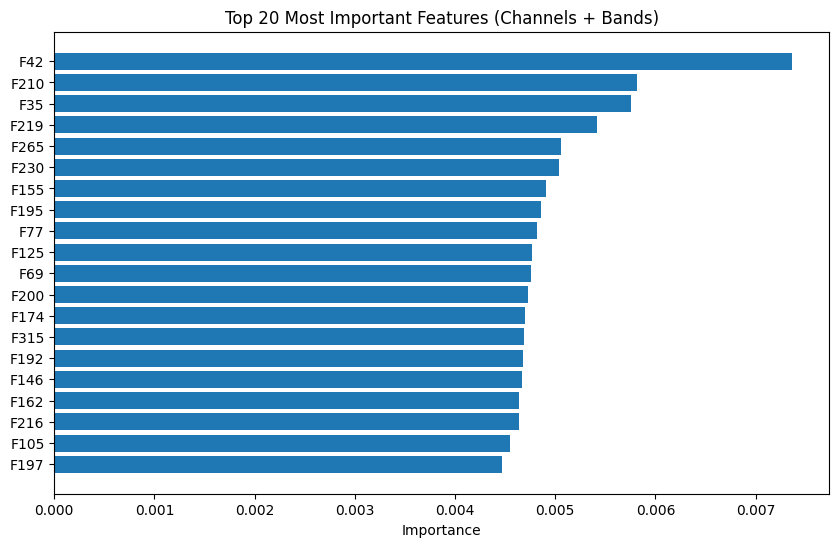

In [34]:
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[-20:]  # top 20 features

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [f"F{idx}" for idx in sorted_idx])
plt.title("Top 20 Most Important Features (Channels + Bands)")
plt.xlabel("Importance")
plt.show()


In [43]:
model = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',    # important
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_oob.fit(X_train, y_train)

print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.4827586206896552


In [39]:
sample = X_test[0:1]  # pick first test trial
pred = model.predict(sample)
print("Predicted:", "Left" if pred[0]==0 else "Right")


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
sample = X_test[0:1]  # pick first test trial
pred = model.predict(sample)
print("Predicted:", "Left" if pred[0]==0 else "Right")


NameError: name 'model' is not defined

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_all, test_size=0.2, random_state=42, stratify=y_all
)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [39]:
sample = X_test[0:1]  # pick first test trial
pred = model.predict(sample)
print("Predicted:", "Left" if pred[0]==0 else "Right")


Predicted: Left


Test Accuracy: 0.4659090909090909
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        44
           1       0.46      0.43      0.45        44

    accuracy                           0.47        88
   macro avg       0.47      0.47      0.47        88
weighted avg       0.47      0.47      0.47        88



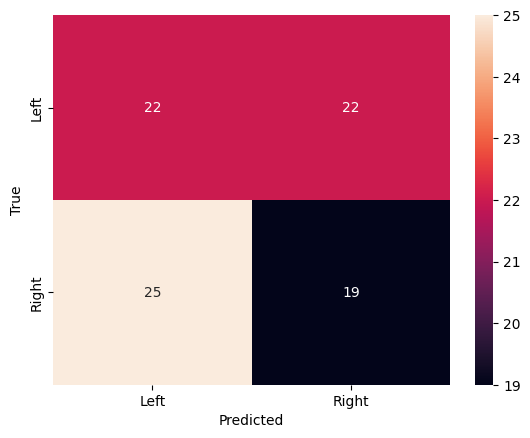

In [42]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Left','Right'], yticklabels=['Left','Right'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
!pip install pyautogui


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=pyautogui-0.9.54-py3-none-any.whl size=37684 sha256=d383c11c00d6a846690524a7c3d529ca2a573a4691cf1847cdbc81f5bf38231f
  Stored in directory: /root/.cache/pip/wheels/d9/d6/47/04075995b093ecc87c212c9a3dbd34e59456c6fe504d65c3e4
  Created wheel for

In [43]:
import pyautogui

# Function to move mouse based on predicted label
def control_mouse(pred, move=False):
    """
    pred: 0 → Left, 1 → Right
    move: True → actually move mouse, False → just print
    """
    if pred == 0:
        print("Moving mouse Left")
        if move:
            pyautogui.moveRel(-50, 0)  # move left
    elif pred == 1:
        print("Moving mouse Right")
        if move:
            pyautogui.moveRel(50, 0)   # move right


KeyError: 'DISPLAY'

In [44]:
def control_mouse(pred):
    """
    Simulated mouse control: just prints actions.
    pred: 0 → Left, 1 → Right
    """
    if pred == 0:
        print("Simulated Mouse Move: LEFT")
    elif pred == 1:
        print("Simulated Mouse Move: RIGHT")


In [46]:
sample = X_test[0:2]
pred = model.predict(sample)
control_mouse(pred[0])


Simulated Mouse Move: LEFT


In [47]:
# Make predictions for all test samples
y_pred = model.predict(X_test)

# Loop through test samples to simulate mouse movement
for i in range(len(X_test)):
    pred = y_pred[i]
    control_mouse(pred)   # just prints action


Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: RIGHT
Simulated Mouse Move: LEFT
Simulated Mouse Move: LEFT
Simulated Mou

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=['Left','Right']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Left','Right'], yticklabels=['Left','Right'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


NameError: name 'y_test' is not defined

In [49]:
import mne

# Example for one raw EEG file
raw = mne.io.read_raw_edf(edf_file, preload=True, verbose=False)

# Apply band-pass filter
raw.filter(l_freq=0.5, h_freq=45, fir_design='firwin')


NameError: name 'edf_file' is not defined